In [1]:
# %%
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import seaborn as sns
import os
from experiment_utils import experiment, alpha_experiment, interactive_alignment_plot_py3dmol
# %matplotlib widget

In [2]:
data_path = "../Data/FGG-Tripeptide/"
mol_pair_list_path = os.path.join(data_path, 'list')
molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='FGG')
#mol_set = set()
#for nameA, nameB in molecule_pairs:
#    mol_set.add(nameA)
#    mol_set.add(nameB)
#for name in mol_set:
#    mol = next(pybel.readfile('xyz', os.path.join(data_path, name + '.xyz')))
#    X, _, _ = otm.tl.process_molecule(mol) 
#    _, T_sy2 = otm.tl.parse_sy2(os.path.join(data_path, name + '.sy2'))
#    T_mna = otm.tl.parse_mna(os.path.join(data_path, name + '.mna'))
#    otm.tl.write_xyz_with_custom_labels('../Data/FGG-Tripeptide/{}_sy2.xyz'.format(name), X, T_sy2)
#    otm.tl.write_xyz_with_custom_labels('../Data/FGG-Tripeptide/{}_mna.xyz'.format(name), X, T_mna)

In [3]:
cst_D = 0.5
otmol_name_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='element name', 
    alpha_list=np.linspace(0,1,101), 
    dataset_name = 'FGG',
    save = True,
    cst_D=cst_D
    )
otmol_type_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom type', 
    alpha_list=np.linspace(0,1,101), 
    dataset_name = 'FGG',
    save = True,
    cst_D=cst_D
    )
otmol_conn_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom connectivity', 
    alpha_list=np.linspace(0,1,101), 
    dataset_name = 'FGG',
    save = True,
    cst_D=cst_D
    )

0 252_FGG55 253_FGG99 2.11
1 252_FGG55 254_FGG300 2.58
2 252_FGG55 255_FGG252 2.51
3 252_FGG55 256_FGG366 2.61
4 252_FGG55 257_FGG215 2.31
5 252_FGG55 258_FGG224 2.30
6 252_FGG55 259_FGG380 1.43
7 252_FGG55 260_FGG412 2.20
8 252_FGG55 261_FGG444 2.36
9 252_FGG55 262_FGG470 2.41
10 252_FGG55 263_FGG80 2.06
11 252_FGG55 264_FGG114 2.17
12 252_FGG55 265_FGG357 2.02
13 252_FGG55 266_FGG691 2.90
0 252_FGG55 253_FGG99 2.20
1 252_FGG55 254_FGG300 2.60
2 252_FGG55 255_FGG252 2.40
3 252_FGG55 256_FGG366 2.66
4 252_FGG55 257_FGG215 2.29
5 252_FGG55 258_FGG224 2.52
6 252_FGG55 259_FGG380 1.40
7 252_FGG55 260_FGG412 2.15
8 252_FGG55 261_FGG444 2.36
9 252_FGG55 262_FGG470 2.43
10 252_FGG55 263_FGG80 1.98
11 252_FGG55 264_FGG114 1.97
12 252_FGG55 265_FGG357 2.10
13 252_FGG55 266_FGG691 2.81
0 252_FGG55 253_FGG99 2.25
1 252_FGG55 254_FGG300 2.64
2 252_FGG55 255_FGG252 2.53
3 252_FGG55 256_FGG366 2.66
4 252_FGG55 257_FGG215 2.39
5 252_FGG55 258_FGG224 2.52
6 252_FGG55 259_FGG380 1.60
7 252_FGG55 260_F

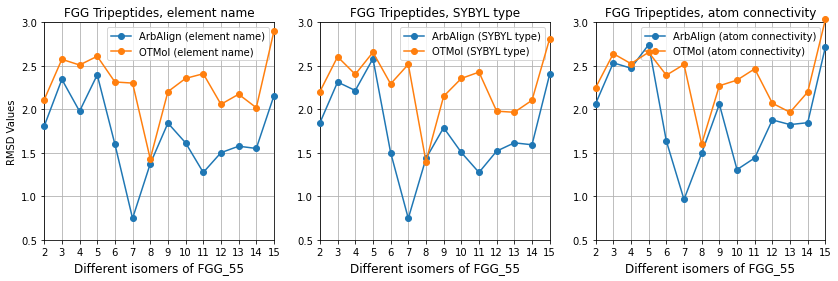

In [19]:
arbalign_res = pd.read_csv('./arbalign_output/FGG_result.csv')

combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(ArbAlign+element name)': 'ArbAlign (element name)', 
        'RMSD(ArbAlign+atom type)': 'ArbAlign (SYBYL type)',
        'RMSD(ArbAlign+atom connectivity)': 'ArbAlign (atom connectivity)'
        }), 
    otmol_name_res.rename(columns={'RMSD(OTMol+element name)': 'OTMol (element name)'}), 
    otmol_type_res.rename(columns={'RMSD(OTMol+atom type)': 'OTMol (SYBYL type)'}), 
    otmol_conn_res.rename(columns={'RMSD(OTMol+atom connectivity)': 'OTMol (atom connectivity)'}
    ), 
    ], axis=1)

 
plt.figure(figsize=(14,4))
plt.subplot(131)
columns_to_plot = ["ArbAlign (element name)", "OTMol (element name)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(132)
columns_to_plot = ["ArbAlign (SYBYL type)", "OTMol (SYBYL type)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, SYBYL type")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(133)
columns_to_plot = ["ArbAlign (atom connectivity)", "OTMol (atom connectivity)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, atom connectivity")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend(loc='upper right')
plt.grid(True)

#plt.savefig('../images/FGG.png', dpi=300, bbox_inches='tight')

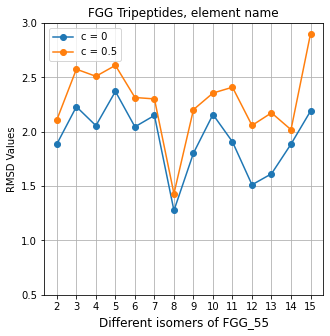

In [9]:
FGG_otmol_name = pd.read_csv('./otmol_output/FGG_element_name_fGW_cstD=0.0_results.csv').rename(columns={'RMSD(OTMol+element name)': 'c = 0'})['c = 0']
FGG_otmol_name_ = pd.read_csv('./otmol_output/FGG_element_name_fGW_cstD=0.5_results.csv').rename(columns={'RMSD(OTMol+element name)': 'c = 0.5'})['c = 0.5']
plt.figure(figsize=(5,5))
#for column in columns_to_plot:
plt.plot(range(2,16), FGG_otmol_name, marker='o', label='c = 0')
plt.plot(range(2,16), FGG_otmol_name_, marker='o', label='c = 0.5')
plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)
plt.savefig('../images/FGG_element_name.png', dpi=300, bbox_inches='tight')

In [4]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/253_FGG99.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][0]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [5]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/254_FGG300.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][1]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/255_FGG252.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][2]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

2.509745871328753


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [7]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/256_FGG366.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][3]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [8]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/257_FGG215.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][4]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [10]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/258_FGG224.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][5]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [11]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/259_FGG380.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][6]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [12]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/260_FGG412.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][7]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [13]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/261_FGG444.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][8]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [26]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/262_FGG470.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][9]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

2.409235312028563


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [15]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/263_FGG80.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][10]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [16]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/264_FGG114.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][11]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [17]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/265_FGG357.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][12]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [18]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/266_FGG691.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][13]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

alpha

No valid permutation found
1.0


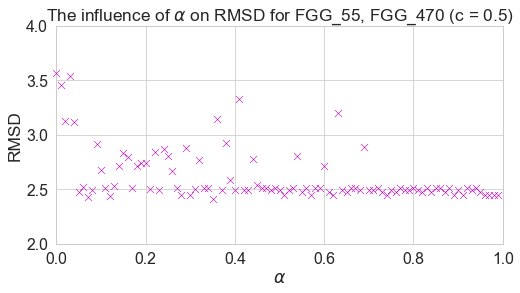

In [25]:
alpha_list = np.linspace(0, 1, 101)
alpha_result = alpha_experiment(data_path, '252_FGG55', '262_FGG470', alpha_list=alpha_list, cst_D=0.5)
# Set seaborn style and context
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
sns.set_palette("Set1")
# Create the plot using seaborn
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=alpha_result,
    x='alpha',
    y='RMSD(OTMol+element name)',
    marker='x',
    s=50,
    color='m',
    #label=r'FGG$\_$55, FGG$\_$224',
    clip_on=False,
    zorder=10
)
plt.xlim(0, 1)
plt.ylim(2, 4)
plt.xlabel(r'$\alpha$')
plt.ylabel('RMSD')
plt.xticks(np.linspace(0, 1, 6))
plt.title(r'The influence of $\alpha$ on RMSD for FGG$\_$55, FGG$\_$470 (c = 0.5)')
# Save the figure
plt.savefig('../images/alpha_FGG_element_name.png', dpi=300, bbox_inches='tight')

In [23]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/262_FGG470.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
i = 1
assignment = alpha_result['assignment'][i]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
print(alpha_result['alpha'][i], otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

0.01 3.45411345450871


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [24]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/262_FGG470.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
i = 80
assignment = alpha_result['assignment'][i]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
print(alpha_result['alpha'][i], otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

0.8 2.51345473680806


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [24]:
# deprecated
"""
data_path = "../Data/FGG-Tripeptide/"
mol_pair_list_path = os.path.join(data_path, 'list')
molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='FGG')
GW_name_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='element name', 
    dataset_name = 'FGG',
    save = True,
    plain_GW = True,
    )
GW_type_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom type', 
    dataset_name = 'FGG',
    save = True,
    plain_GW = True,
    )
GW_conn_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom connectivity', 
    dataset_name = 'FGG',
    save = True,
    plain_GW = True,
    )
"""

'\ndata_path = "../Data/FGG-Tripeptide/"\nmol_pair_list_path = os.path.join(data_path, \'list\')\nmolecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type=\'FGG\')\nGW_name_res = experiment(\n    data_path, \n    molecule_pairs, \n    setup=\'element name\', \n    dataset_name = \'FGG\',\n    save = True,\n    plain_GW = True,\n    )\nGW_type_res = experiment(\n    data_path, \n    molecule_pairs, \n    setup=\'atom type\', \n    dataset_name = \'FGG\',\n    save = True,\n    plain_GW = True,\n    )\nGW_conn_res = experiment(\n    data_path, \n    molecule_pairs, \n    setup=\'atom connectivity\', \n    dataset_name = \'FGG\',\n    save = True,\n    plain_GW = True,\n    )\n'

In [25]:
"""
arbalign_res = pd.read_csv('./arbalign_output/FGG_result.csv')

combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(ArbAlign+element name)': 'ArbAlign (element name)', 
        'RMSD(ArbAlign+atom type)': 'ArbAlign (SYBYL type)',
        'RMSD(ArbAlign+atom connectivity)': 'ArbAlign (atom connectivity)'
        }), 
    GW_name_res.rename(columns={'RMSD(GW+element name)': 'GW (element name)'}), 
    GW_type_res.rename(columns={'RMSD(GW+atom type)': 'GW (SYBYL type)'}), 
    GW_conn_res.rename(columns={'RMSD(GW+atom connectivity)': 'GW (atom connectivity)'}
    ), 
    ], axis=1)

 
plt.figure(figsize=(14,4))
plt.subplot(131)
columns_to_plot = ["ArbAlign (element name)", "GW (element name)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
#plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(132)
columns_to_plot = ["ArbAlign (SYBYL type)", "GW (SYBYL type)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, SYBYL type")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
#plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(133)
columns_to_plot = ["ArbAlign (atom connectivity)", "GW (atom connectivity)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, atom connectivity")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
#plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend(loc='upper right')
plt.grid(True)

#plt.savefig('../images/FGG.png', dpi=300, bbox_inches='tight')
"""

'\narbalign_res = pd.read_csv(\'./arbalign_output/FGG_result.csv\')\n\ncombined_df = pd.concat([\n    arbalign_res.rename(columns={\n        \'RMSD(ArbAlign+element name)\': \'ArbAlign (element name)\', \n        \'RMSD(ArbAlign+atom type)\': \'ArbAlign (SYBYL type)\',\n        \'RMSD(ArbAlign+atom connectivity)\': \'ArbAlign (atom connectivity)\'\n        }), \n    GW_name_res.rename(columns={\'RMSD(GW+element name)\': \'GW (element name)\'}), \n    GW_type_res.rename(columns={\'RMSD(GW+atom type)\': \'GW (SYBYL type)\'}), \n    GW_conn_res.rename(columns={\'RMSD(GW+atom connectivity)\': \'GW (atom connectivity)\'}\n    ), \n    ], axis=1)\n\n \nplt.figure(figsize=(14,4))\nplt.subplot(131)\ncolumns_to_plot = ["ArbAlign (element name)", "GW (element name)"]\nfor column in columns_to_plot:\n    plt.plot(range(2,16), combined_df[column], marker=\'o\', label=column, clip_on=False, zorder=10)\nplt.title("FGG Tripeptides, element name")\nplt.xlabel("Different isomers of FGG_55", fontsize = 